#Self Organizing Map

##Install MiniSom Package

In [1]:
!pip install MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=3c8c81acf5fdc14ffa6753b7c5918adbdef532820dc5b6cbda99dea802780021
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built MiniSom


### Importing the libraries


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [32]:
# 사기꾼 고객 찾기
# https://archive.ics.uci.edu/dataset/143/statlog+australian+credit+approval
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [33]:
X.shape, y.shape

((690, 15), (690,))

## Feature Scaling


In [34]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [35]:
X[0]

array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
       0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.05      , 0.01212   ])

##Training the SOM


In [36]:
from minisom import MiniSom

som = MiniSom(x = 10, y = 10  # 그리드 크기(지도크기)
              , input_len = 15
              , sigma = 1           # default
              , learning_rate = 0.5 # default
              )

In [37]:
# 훈련데이터(무게를 초기화)
som.random_weights_init(X)

In [38]:
# 그리드에 훈련
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


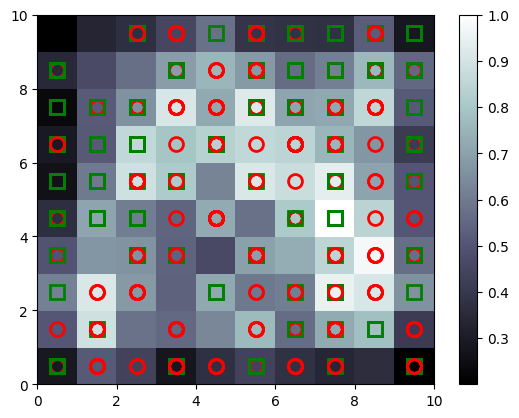

In [39]:
# 시각화로 동떨어진 뉴런 찾기
from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()
# MID가 클 수록 밝은 컬러 = 사기꾼

# 마커 추가
markers = ['o','s']
colors = ['r','g']

for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0] + 0.5   # 가로 중앙
      ,w[1] + 0.5   # 세로 중앙
      ,markers[y[i]]
      ,markeredgecolor =  colors[y[i]]
      ,markerfacecolor = 'None'
      ,markersize=10
      ,markeredgewidth = 2
  )
show()

## Finding the frauds


In [42]:
# 위닝 노드 좌표, 고객 정보
mappings = som.win_map(X)

In [43]:
type(mappings)

collections.defaultdict

In [47]:
# 지도를 통해 동떨어진 위닝노드의 좌표(8,3) 얻기
frauds = np.concatenate((mappings[(8,3)],mappings[(7,4)]),axis=0) # => (8,3),(7,4)좌표 위닝노드와 관련된 고객 정보 가져

In [48]:
frauds

array([[3.44989969e-01, 0.00000000e+00, 3.75939850e-01, 5.35714286e-02,
        5.00000000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e-01, 3.80000000e-02, 0.00000000e+00],
       [4.28156121e-01, 0.00000000e+00, 3.45864662e-01, 1.68214286e-01,
        5.00000000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [6.84017475e-01, 0.00000000e+00, 2.67969925e-01, 4.01785714e-01,
        5.00000000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e-01, 9.20000000e-02, 5.20000000e-02],
       [8.54898710e-01, 0.00000000e+00, 2.04210526e-01, 5.94642857e-02,
        5.00000000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+0

In [49]:
frauds = sc.inverse_transform(frauds)

In [51]:
frauds[0]

array([1.5651868e+07, 0.0000000e+00, 3.8750000e+01, 1.5000000e+00,
       2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       2.0000000e+00, 7.6000000e+01, 1.0000000e+00])